In [54]:
#Input NPM
NPM = "1706040031"

#Input NPM teman yang berkolaborasi dengan Anda dalam mengerjakan tugas ini
KOLABORATOR = [None]

#Input link referensi atau sumber lain yang Anda gunakan dalam menyelesaikan tugas ini
REFERENSI = [
    "https://www.youtube.com/watch?v=DDBk3ZFNtJc",
    "https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d",
    "https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795",
    "http://www.adeveloperdiary.com/data-science/deep-learning/neural-network-with-softmax-in-python/",
    "https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7"
    "https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9",
]

## PR 3 Neural Network

#### Tugas ini terdiri dari 2 bagian:

* Implementasi (Score: 50)
    * [Soal 1 - Implementasi Layer Neural Network](#Soal-1)
    * [Soal 2 - Implementasi Loss Function](#Soal-2)
    * [Soal 3 - Implementasi Optimizer](#Soal-3)
    * [Soal 4 - Analisis Neural Network](#Soal-4)
* Demo program (Score: 50) (jadwal demo akan diumumkan via scele)
* Dataset yang digunakan untuk Neural Network adalah fashion.csv

* Berikut ketentuan pengerjaan PR 3:

   - Silahkan untuk menjawab di bagian <b># YOUR CODE HERE</b>

   - Jangan mengubah class dan method yang sudah ada, tetapi Anda dipersilahkan untuk menambah parameter, variabel, atau method baru jika diperlukan

   - Library yang boleh digunakan hanya yang disebutkan pada cell di bawah

   - Berikan penjelasan singkat mengenai code yang Anda bangun

In [55]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import traceback
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

### Dataset Fashion
* Pada PR ini Anda diminta untuk mengimplementasikan Neural Network untuk memprediksi kategori pada data fashion
* Data yang digunakan memiliki 785 atribut, yaitu pixel1 sampai pixel784 yang merepresentasikan pixel-pixel dari gambar fashion, dan kategori. Atribut yang akan diprediksi adalah kategori

In [56]:
df = pd.read_csv("fashion-mnist.csv")
df.head()

kategori  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         2       0       0       0       0       0       0       0       0   
1         9       0       0       0       0       0       0       0       0   
2         6       0       0       0       0       0       0       0       5   
3         0       0       0       0       1       2       0       0       0   
4         3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [57]:
# Pemisahan fitur dan target
features = df.drop(["kategori"], axis=1).values
target = df["kategori"].values

In [58]:
# Preprocessing data

df.shape

(60000, 785)

In [59]:
encoder = OneHotEncoder(categories='auto')
X, y = features, encoder.fit_transform(target.reshape(-1,1)).todense().astype(np.uint8)
X.shape

(60000, 784)

## Soal 1 
### Layer Neural Network (20 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan Activation Layer (Sigmoid dan Softmax) dan Dense Layer dari Neural Network

In [60]:
class Layer:
    """
    building block of a layer in creating a layer in NN
    """
    def __init__(self):
        pass
    
    def forward(self, _input):
        """
        takes input in shape of [batch, input_units]
        return output shape  of[batch, output_units]
        """
        return _input

    def backward(self, _input, grad_output):
        """
        Performs a backpropagation step through the layer, with respect to the given input.
        """
        return [np.dot(grad_output, _input)]

### Activation Layer

* Activation Layer yang diminta untuk diimplementasi meliputi Sigmoid dan Stable Softmax
* Activation Layer dapat didefinisikan seperti persamaan di bawah ini
  $$a^{[l]} = g(z^{[l]})$$ dimana g adalah non-linear function (misalnya tanh, relu, sigmoid) dan z adalah input

### Relu

In [61]:
class Relu(Layer):
    def __init__(self):
        pass
    
    def forward(self, _input):
        return np.maximum(0, _input)
    
    def backward(self, _input, grad_output):
        """
        relu gradient is a step function (1 if input > 0 else 0)
        """
        relu_grad = _input > 0
        return [grad_output*relu_grad]

In [62]:
relu = Relu()

In [63]:
# example of X with 5 features and 10 example
x = np.linspace(-1,1,2*5).reshape([5,2])
x.shape

(5, 2)

In [64]:
x

array([[-1.        , -0.77777778],
       [-0.55555556, -0.33333333],
       [-0.11111111,  0.11111111],
       [ 0.33333333,  0.55555556],
       [ 0.77777778,  1.        ]])

In [65]:
relu.forward(x)

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.11111111],
       [0.33333333, 0.55555556],
       [0.77777778, 1.        ]])

In [66]:
# to compute its gradient we can just specify
# relu.backward(x, np.ones(x.shape))
# it will tell you that dx / d(what ever) = 1
# so that it will compute d (what ever) / d(relu) = (d relu / dx) * (dx / d(what ever))
# = d (what ever) / d(relu) = (d relu / dx) * 1
# = d (what ever) / d(relu) = (d relu / dx)
relu.backward(x, np.ones(x.shape))

[array([[0., 0.],
        [0., 0.],
        [0., 1.],
        [1., 1.],
        [1., 1.]])]

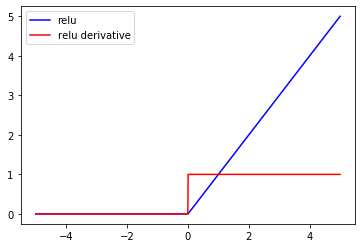

In [67]:
# Playground
x = np.linspace(-5,5, 1000).reshape(-1, 1000)
plt.plot(x[0], relu.forward(x)[0], 'b', x[0], relu.backward(x, np.ones(x.shape))[0][0], 'r')
plt.legend(['relu', 'relu derivative'], loc='best')
plt.show()

### Sigmoid

In [68]:
class Sigmoid(Layer):
    
    def __init__(self):
        pass

    def forward(self, _input):
        # dah lulus test
        return 1 / (1 + np.exp(-_input))
        
        
    def backward(self, _input, grad_output):
        sig = self.forward(_input)
        grad_input = grad_output * sig * (1 - sig)
        
        return [grad_input]

In [69]:
sigmoid = Sigmoid()

# lulus
np.testing.assert_almost_equal(
    sigmoid.forward(np.array([[-99,-99], [0,0],[1,1], [99,99]])), 
    np.array([[0, 0], [0.5,0.5], [0.7310586,0.7310586], [1, 1]])
)

# lulus keknya
np.testing.assert_almost_equal(
    sigmoid.backward(np.array([[-99,-99], [99,99]]), np.ones((2,2)))[0], 
    np.array([[0,0], [0, 0]])
)

# lulus
np.testing.assert_almost_equal(
    sigmoid.backward(np.array([[1, 1], [0,0]]), np.ones((2,2)))[0], 
    np.array([[0.1966119, 0.1966119], [0.25, 0.25]])
)


In [70]:
#playground
x = np.linspace(-5,5, 1000).reshape(-1, 1000)
plt.plot(x[0], sigmoid.forward(x)[0], 'b', x[0], sigmoid.backward(x, np.ones(x.shape))[0][0], 'r')
plt.legend(['sigmoid', 'sigmoid derivative'], loc='best')
plt.show()

### Softmax

In [71]:
np.exp(100)

2.6881171418161356e+43

In [72]:
softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
softmax([0, 1, 5])

array([0.00657326, 0.01786798, 0.97555875])

In [73]:
softmax([0, 1000, 5000])

c:\users\gemap\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
c:\users\gemap\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 0., nan, nan])

### Stable Softmax

* Masalah yang dapat dilihat pada softmax adalah hasil dari softmax tidak stabil ketika input yang diberikan terlalu besar (jarang terjadi tetapi mungkin dapat terjadi jika menggunakan relu activation function).
* Oleh karena itu, diperlukan softmax yang lebih stabil terhadap besarnya input yang diberikan.
* Untuk membuat stable softmax, kita dapat menggeser nilai maks mendekati 0

In [74]:
class Softmax(Layer):
    
    def __init__(self):
        pass

    # https://deepnotes.io/softmax-crossentropy#the-softmax-function
    def forward(self, _input):
        expZ = np.exp(_input - np.max(_input, axis=1, keepdims=True))
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    
    def backward(self, _input, grad_output):
        return [grad_output]

In [75]:
softmax = Softmax()

# Lulus
np.testing.assert_almost_equal(
    softmax.forward(np.array([[100],[1],[0]])), 
    np.array([[1],[1],[1]])
)

# Lulus
np.testing.assert_almost_equal(
    softmax.forward(np.array([[100,3000],[1,1],[0,1]])), 
    np.array([[0,1],[0.5,0.5],[0.2689414, 0.7310586]])
)

## Dense

* single dense layer untuk **forward propagation** dapat didefinisikan seperti di bawah ini 
$$z^{[l]} = W^{[l]}*a^{[l-1]} + b^{[l]} $$  dengan $a^{[l-1]}$ merupakan input untuk forward function (Anda dapat mendapatkannya dari parameter _input)


* single dense layer untuk **backward propagation** dapat didefinisikan seperti di bawah ini

    misalkan Anda sudah menghitung $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$ dan Anda ingin menghitung $da^{[l-1]} , dW^{[l]}, db^{[l]}$

    yang perlu Anda lakukan hanyalah menghitung

    $da^{[l-1]}= \frac{\partial \mathcal{L} }{\partial a^{[l-1]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial Z^{[l]} }{\partial a^{[l-1]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial (W^{[l]}*a^{[l-1]} + b^{[l]}) }{\partial a^{[l-1]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} . W^{[l]}$

    $dW^{[l]}= \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial Z^{[l]} }{\partial W^{[l]}} = $ ?

    $db^{[l]}= \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial Z^{[l]} }{\partial b^{[l]}} = $ ?

    **REMINDER: NN yang kita gunakan memiliki shape [batch , input_unit ]. Oleh karena itu Anda harus menggunakan semua training example dalam suatu batch untuk menghitung gradien.**
    
    dengan $a^{[l-1]}$ dan $\frac{\partial \mathcal{L} }{\partial Z^{[l]}}$ merupakan input untuk backward function (Anda dapat mendapatkannya dari parameter _input dan parameter grad_output)


In [76]:
class Dense(Layer):
    def __init__(self, input_shape, output_shape, weight_initializer='random'):

        if weight_initializer not in ['xavier','random']:
            raise ValueError('weight_initializer must be either xavier or random')

        if weight_initializer == 'random':
            self.weights = np.random.randn(input_shape, output_shape)*1e-2
        
        elif weight_initializer == 'xavier':
            self.weights = np.random.randn(input_shape, output_shape)*np.sqrt(2/(input_shape + output_shape))
        
        self.bias = np.random.randn(output_shape)
    
    # https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9
    def forward(self, _input):
        return np.dot(_input, self.weights) + self.bias
        
    # https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9
    def backward(self, _input, grad_output):
        grad_input = np.dot(grad_output, self.weights.T)
        grad_weights = np.dot(_input.T, grad_output)
        grad_bias = grad_output.mean(axis=0)*_input.shape[0]
        
        return [grad_input, grad_weights, grad_bias]

In [77]:
np.random.seed(3)
dense = Dense(2,2)
np.testing.assert_almost_equal(dense.forward(np.ones([3,2])), np.array([[-0.25853694, -0.36902881], [-0.25853694, -0.36902881],[-0.25853694, -0.36902881]]))

dense.weights = np.ones((2,2))
dense.bias = np.zeros(2)
backprop = dense.backward(np.array([[1,1]]), np.array([[1,1]]))

# lulus semua
np.testing.assert_almost_equal(backprop[0], np.array([[2., 2.]]))
np.testing.assert_almost_equal(backprop[1], np.array([[1., 1.], [1., 1.]]))
np.testing.assert_almost_equal(backprop[2], np.array([1., 1.]))

assert dense.weights.shape == backprop[1].shape
assert dense.weights.shape[0] == backprop[0].shape[1]

## Soal 2
### Loss Function (20 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan Binary Log Loss dan Softmax Cross Entropy Loss

## Binary Log Loss

* Anda diminta untuk menghitung binary log loss function untuk m sample and gradiennya


In [78]:
# https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
# https://stats.stackexchange.com/questions/219241/gradient-for-logistic-loss-function
def binary_log_loss(y_true, y_pred):
    """
        input: y_true, y_pred (numpy array with shape [batch_size, 1])
        output: bin_log_loss (numpy float64)
                bin_log_loss_grad (numpy array with shape [batch_size, 1])
    """
    # YOUR CODE HERE
    N = y_pred.size
    bin_log_loss = (y_true * np.log(y_pred) + (1-y_true) * np.log(1 - y_pred)) / -N
    bin_log_loss = np.sum(bin_log_loss)
    
    bin_log_loss_grad = (y_pred - y_true)/(y_pred*(1 - y_pred))
 
    return bin_log_loss, bin_log_loss_grad

# dont worry about this we will use it later
def binary_log_loss_with_sigmoid(layer_input_output_cache, y_true):
    return binary_log_loss(layer_input_output_cache[-1], y_true)


In [79]:
loss, grad = binary_log_loss(np.array([[1],[0]]),np.array([[1-1e-9],[0+1e-9]]))

np.testing.assert_almost_equal(loss, 0)
np.testing.assert_almost_equal(grad[0], -1)
np.testing.assert_almost_equal(grad[1], 1)

loss, grad = binary_log_loss(np.array([[1]]),np.array([[0.5]]))
np.testing.assert_almost_equal(loss, np.log(2))
assert grad[0][0] == -2

## Softmax Cross Entropy Loss

* Rumus cross entropy loss untuk single example adalah sebagai berikut
$$L(y^{true}, y^{pred}) = - \sum\limits_{j=1}^k y_j^{true} log(y_j^{pred})$$

* Sedangkan rumus cross entropy loss untuk single batch adalah sebagai berikut

  $$L(y^{true}, y^{pred}) =  \frac{-1}{m} \sum\limits_{i=1}^m \sum\limits_{j=1}^k y_{i,j}^{true} log(y_{i,j}^{pred})$$ dimana m merupakan jumlah data dalam single batch

In [80]:
def softmax_cross_entropy(y_true, y_pred):

    k = y_true.shape[0]
    softmax_cross_entropy_loss = -(y_true * np.log(y_pred))
    softmax_cross_entropy_loss = (np.sum(softmax_cross_entropy_loss)) / k
    softmax_cross_entropy_grad = y_pred - y_true
    return softmax_cross_entropy_loss, softmax_cross_entropy_grad

# dont worry about this we will use it later
def softmax_cross_entropy_with_logits(layer_input_output_cache, y_true, softmax=Softmax()):
    logits = layer_input_output_cache[-1]
    y_pred = softmax.forward(logits)
    return softmax_cross_entropy(y_true, y_pred)

In [81]:
loss, _ = softmax_cross_entropy(
    np.array([[1,0],[0,1]]),
    np.array([[1-1e-9,0+1e-9],[1+1e-9,1-1e-9]])
)
np.testing.assert_almost_equal(loss, 0) # Lulus

loss, _ = softmax_cross_entropy(
    np.array([[1,0],[0,1],[0,1]]),
    np.array([[0.5,0.5],[0.5,0.5],[0.5,0.5]])
)
np.testing.assert_almost_equal(loss, np.log(2)) # Lulus

loss, _ = softmax_cross_entropy(np.array([[1,0,0],[0,1,0],[0,0,1]]),np.array([[0.5,0.25,0.25],[0.5,0.25,0.25],[0.25,0.25,0.5]]))
np.testing.assert_almost_equal(loss, 0.9241962407465937) # Lulus


## Soal 3
### Optimizer (5 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan update layer pada Momentum Optimizer

In [82]:
class Optimizer:
    def __init__(self, model, loss_func):
        self.model = model
        self.loss_func = loss_func
    
    
    def update_layer(self, layer, weight, bias):
        raise NotImplementedError

    # forward propagation    
    def _forward(self, _input):
        #cache the input and output to use later
        layer_input_output_cache = [_input]   
        
        #forward propagate for each layer
        for layer in self.model.layers:
            _input = layer.forward(_input)
            layer_input_output_cache.append(_input)
        
        return layer_input_output_cache
    
    def _backward(self, layer_input_output_cache, output_grad):
        # reverse loop
        for j in range(len(self.model.layers))[::-1]:

            layer = self.model.layers[j]

            # list of gradient
            D_list = layer.backward(layer_input_output_cache[j], output_grad)

            # update output grad and
            if len(D_list) > 1:
                # if contain weight and bias update this layer bias and weight
                [output_grad, weight, bias] = D_list
                self.update_layer(layer, weight, bias)
            else:
                output_grad = D_list[0]
    
    def fit(self, X_train, y_train ,X_val=None, y_val=None,n_epoch=100, batch_size=None):

        if batch_size is None:
            batch_size = X_train.shape[0]

        total_m_train= X_train.shape[0]

        
        use_val = X_val is not None
        if use_val:
            total_m_val = X_val.shape[0]

        # we are using the definition of epoch as 1 iteration to all training example
        history_train = []
        history_val = []

        for epoch in range(n_epoch):

            p_bar = tqdm(total=int(total_m_train/batch_size) + 1 if total_m_train%batch_size != 0 else 0)
            try:  
                p_bar.set_description('epoch {}: {}/{} loss: inf'.format(epoch+1, 0, total_m_train))

                history_per_batch = []
                for i in (range(0, total_m_train, batch_size)):

                    #separate each set to minibatches
                    adjusted_batch_size = min(i+batch_size, total_m_train)
                    X_batch_train = X_train[i:adjusted_batch_size]
                    y_batch_train = y_train[i:adjusted_batch_size]


                    # forward propagate
                    layer_input_output_cache = self._forward(X_batch_train)

                    # compute its loss and grad
                    loss, output_grad = self.loss_func(layer_input_output_cache, y_batch_train)
                    # report current progress
                    history_per_batch.append(loss)

                    p_bar.set_description('epoch {}: {}/{} loss: {:4f}'.format(epoch+1, adjusted_batch_size, total_m_train, loss))
                    p_bar.update(1)
                    
                    # backward propagation
                    self._backward(layer_input_output_cache, output_grad)
                history_train.append(history_per_batch)

                train_loss_mean = np.mean(history_per_batch)
                val_loss_mean = None

                if use_val:
                    history_per_batch = []
                    for i in (range(0, total_m_val, batch_size)):

                        #separate each set to minibatches
                        adjusted_batch_size = min(i+batch_size, total_m_val)
                        X_batch_val = X_val[i:adjusted_batch_size]
                        y_batch_val = y_val[i:adjusted_batch_size]

                        # forward propagate
                        layer_input_output_cache = self._forward(X_batch_val)
                        loss, output_grad = self.loss_func(layer_input_output_cache, y_batch_val)

                        history_per_batch.append(loss)
                    history_val.append(history_per_batch)

                    val_loss_mean = np.mean(history_per_batch)
                val_report = ''
                if val_loss_mean is not None:
                    val_report = 'val: {:4f}'.format(val_loss_mean)
                p_bar.close()
                time.sleep(0.2)
                print('\tmean epoch {} loss: train: {:4f}'.format(epoch+1, train_loss_mean),val_report)
                time.sleep(0.2)
            except Exception as e:
                p_bar.close()
                traceback.print_stack()
                raise Exception(e)
                

        return history_train, history_val

## Gradient Descent Optimizer

In [83]:
class GradientDescentOptimizer(Optimizer):
    def __init__(self, model, loss_func, learning_rate=1e-4):
        super().__init__(model, loss_func)
        self.learning_rate = learning_rate
    
    def update_layer(self,layer, grad_weights, grad_bias):
        layer.weights = layer.weights - self.learning_rate * grad_weights
        layer.bias = layer.bias - self.learning_rate * grad_bias

## Momentum Optimizer

In [84]:
# https://cs231n.github.io/neural-networks-3/#sgd
class MomentumOptimizer(Optimizer):
    def __init__(self, model, loss_func, learning_rate=1e-4, beta=0.9):
        super().__init__(model, loss_func)
        self.learning_rate = learning_rate
        self.beta = beta
        self.__reset_velocity()
    
    def __reset_velocity(self):
        self.velocity = {}
    
    def update_layer(self, layer, grad_weights, grad_bias):
        # initialize velocity to zero
        if id(layer) not in self.velocity:
            self.velocity[id(layer)] = 0
            
        # COBA DARI https://www.youtube.com/watch?v=k8fTYJPd3_I
        # LULUS
        self.velocity[id(layer)] = self.beta * self.velocity[id(layer)] + (1 - self.beta) * grad_weights
        layer.weights = layer.weights - self.learning_rate * self.velocity[id(layer)]
        
        layer.bias = layer.bias - self.learning_rate * grad_bias

    
        # YOUR CODE HERE
        # GAGAL (BEDA DIKIT 0.05 0.05)
        #self.velocity[id(layer)] = self.beta * self.velocity[id(layer)] - (self.learning_rate * grad_weights)
        #layer.weights = np.add(layer.weights, self.velocity[id(layer)], casting="unsafe")
        #layer.weights += self.velocity[id(layer)]
        #self.velocity[id(layer)] = self.beta * self.velocity[id(layer)] + (1 - self.beta) 
        
        # GAGAL BEDA 1.0 1.0
        #velocity_prev = self.velocity[id(layer)]
        #self.velocity[id(layer)] = self.beta * self.velocity[id(layer)] - self.learning_rate * grad_weights
        #layer.weights = np.add(layer.weights, -self.beta * velocity_prev + (1 + self.beta) *self.velocity[id(layer)])
        
        # COBA DARI https://d2l.ai/chapter_optimization/momentum.html
        #self.velocity[id(layer)] = np.dot(self.beta, self.velocity[id(layer)]) + grad_weights
        #layer.weights = layer.weights - self.learning_rate * self.velocity[id(layer)]
        
        

In [85]:
dense = Dense(1,2)
dense.weights = np.array([[1, 0]])
dense.bias = np.array([[1, 0]])
mom = MomentumOptimizer(None, lambda x:x, learning_rate=0.1,beta=0.5)

mom.update_layer(dense,1,1)
expected_velocity = 0.5
expected_weight = np.array([[0.95, -0.05]])
#print(dense.weights)
np.testing.assert_almost_equal(dense.weights, expected_weight)

#print(mom.velocity[id(dense)])
assert mom.velocity[id(dense)] == expected_velocity

mom.update_layer(dense,0,0)
expected_velocity = 0.25
expected_weight = np.array([[0.925, -0.075]])
np.testing.assert_almost_equal(dense.weights, expected_weight)
assert mom.velocity[id(dense)] == expected_velocity

In [86]:
#Playground
dense_mom = Dense(1,1)
dense_gd = Dense(1,1)
dense_mom.weights = np.array([[1]])
dense_gd.weights = np.array([[1]])


mom = MomentumOptimizer(None, lambda x:x, learning_rate=1e-4)
gd = GradientDescentOptimizer(None, lambda x:x, learning_rate=1e-4)
gd_history = [1]
mom_history = [1]
velocities = []


# lets say in this part of training phase the gradient is spiky (sometimes 1 sometimes -1)
for k in range(10):
    for i in range(10-k):
        mom.update_layer(dense_mom,-1*(-1 if i%(k+2) else 1) , 1)
        gd.update_layer(dense_gd,-1*(-1 if i%(k+2) else 1) , 1)
        gd_history.append(dense_gd.weights[0][0])
        mom_history.append(dense_mom.weights[0][0])
    
# smooth part of the gradient
for i in range(15):
    mom.update_layer(dense_mom,-0.5/(i+1),1)
    gd.update_layer(dense_gd,-0.5/(i+1),1)
    gd_history.append(dense_gd.weights[0][0])
    mom_history.append(dense_mom.weights[0][0])

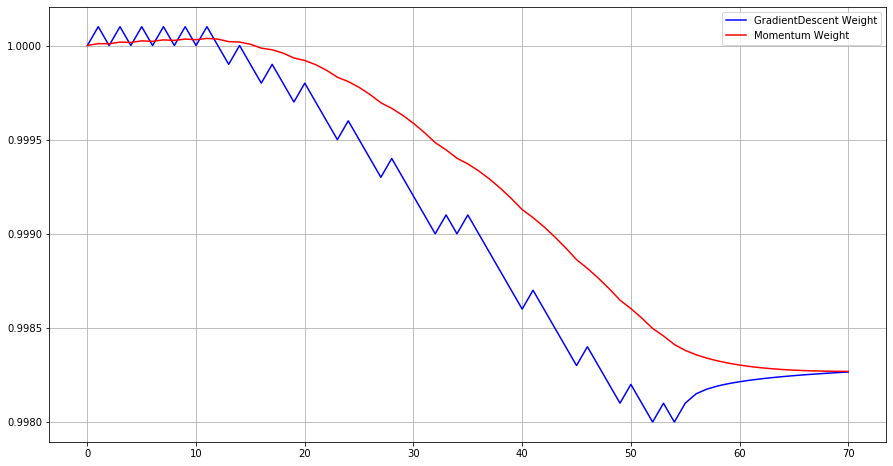

In [87]:
plt.figure(figsize=(15,8))
_iter = list(range(len(gd_history)))
plt.plot(_iter, gd_history, 'b', _iter, mom_history, 'r')
plt.grid()
plt.legend(['GradientDescent Weight', 'Momentum Weight'], loc='best')

## Sequential Model

In [88]:
class Sequential:
    def __init__(self):
        self.layers = []
    
    def append(self, layer):
        assert isinstance(layer, Layer)
        self.layers.append(layer)
    
    def predict_proba(self, X):
        _input = X
        for layer in self.layers:
            _input = layer.forward(_input)
        return _input

## Multi-Class Classification

In [89]:
def create_similar_model(random_state=42, adder=42):
    model = Sequential()
    np.random.seed(random_state+adder)
    model.append(Dense(X.shape[1], 224, 'xavier'))
    model.append(Relu())
    np.random.seed(random_state+2*adder)
    model.append(Dense(224, 224, 'xavier'))
    model.append(Relu())
    np.random.seed(random_state+3*adder)
    model.append(Dense(224, 10, 'xavier'))
    return model

In [90]:
model_1 = create_similar_model()
model_2 = create_similar_model()

In [102]:
gd = GradientDescentOptimizer(model_1, softmax_cross_entropy_with_logits, learning_rate=1e-5)
mom = MomentumOptimizer(model_2, softma x_cross_entropy_with_logits, learning_rate=1e-5)

In [92]:
X_train, X_val, y_train, y_val = train_test_split(X, np.array(y), random_state=22)

In [93]:
history_train_gd, history_val_gd = gd.fit(X_train, y_train, X_val, y_val, batch_size=64, n_epoch=20)

epoch 1: 64/45000 loss: 236.645870:   0%|          | 0/704 [00:00<?, ?it/s]c:\users\gemap\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\gemap\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
epoch 20: 45000/45000 loss: 0.717582: 100%|██████████| 704/704 [00:15<00:00, 44.28it/s]


	mean epoch 1 loss: train:  nan val: 0.976594
	mean epoch 2 loss: train: 0.801335 val: 0.795848
	mean epoch 3 loss: train: 0.677221 val: 0.729085
	mean epoch 4 loss: train: 0.608265 val: 0.695955
	mean epoch 5 loss: train: 0.567628 val: 0.663216
	mean epoch 6 loss: train: 0.535816 val: 0.643360
	mean epoch 7 loss: train: 0.512123 val: 0.630013
	mean epoch 8 loss: train: 0.491910 val: 0.620182
	mean epoch 9 loss: train: 0.475742 val: 0.605334
	mean epoch 10 loss: train: 0.461583 val: 0.601408
	mean epoch 11 loss: train: 0.450255 val: 0.596711
	mean epoch 12 loss: train: 0.439718 val: 0.591852
	mean epoch 13 loss: train: 0.430928 val: 0.584824
	mean epoch 14 loss: train: 0.422971 val: 0.582391
	mean epoch 15 loss: train: 0.415369 val: 0.578724
	mean epoch 16 loss: train: 0.408392 val: 0.574803
	mean epoch 17 loss: train: 0.402610 val: 0.569971
	mean epoch 18 loss: train: 0.396679 val: 0.568214
	mean epoch 19 loss: train: 0.390892 val: 0.564077
	mean epoch 20 loss: train: 0.387241 val: 0.

In [94]:
history_train_mom, history_val_mom = mom.fit(X_train, y_train, X_val, y_val, batch_size=64, n_epoch=20)

epoch 20: 45000/45000 loss: 0.462867: 100%|██████████| 704/704 [00:20<00:00, 34.78it/s]


	mean epoch 1 loss: train: 3.671280 val: 1.059292
	mean epoch 2 loss: train: 0.818801 val: 0.787760
	mean epoch 3 loss: train: 0.638803 val: 0.731906
	mean epoch 4 loss: train: 0.550675 val: 0.666835
	mean epoch 5 loss: train: 0.494782 val: 0.624700
	mean epoch 6 loss: train: 0.457133 val: 0.588752
	mean epoch 7 loss: train: 0.428747 val: 0.567256
	mean epoch 8 loss: train: 0.407225 val: 0.553639
	mean epoch 9 loss: train: 0.389251 val: 0.543771
	mean epoch 10 loss: train: 0.373314 val: 0.538937
	mean epoch 11 loss: train: 0.360726 val: 0.531774
	mean epoch 12 loss: train: 0.349983 val: 0.526614
	mean epoch 13 loss: train: 0.340107 val: 0.522604
	mean epoch 14 loss: train: 0.330709 val: 0.518543
	mean epoch 15 loss: train: 0.322672 val: 0.517250
	mean epoch 16 loss: train: 0.315631 val: 0.512429
	mean epoch 17 loss: train: 0.308787 val: 0.510349
	mean epoch 18 loss: train: 0.302520 val: 0.508856
	mean epoch 19 loss: train: 0.296784 val: 0.507802
	mean epoch 20 loss: train: 0.291193 val

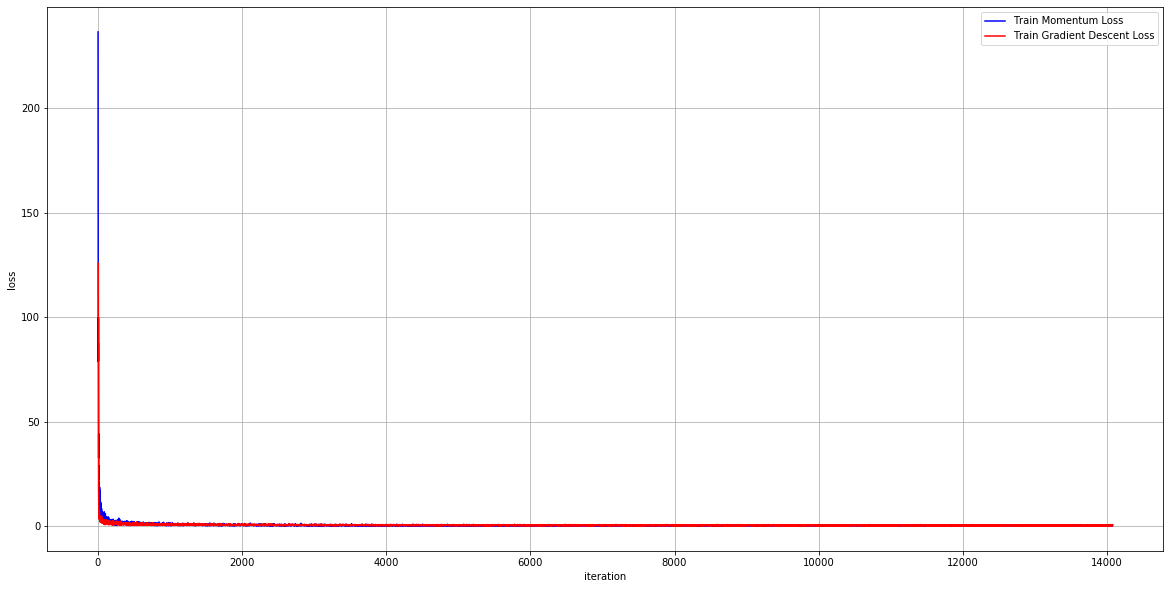

In [95]:
history_mom_ravel_train = np.array(history_train_mom).ravel()
history_gd_ravel_train = np.array(history_train_gd).ravel()
total_iter = list(range(len(history_mom_ravel_train)))
plt.figure(figsize=(20,10))
plt.plot(total_iter, history_mom_ravel_train, 'b', total_iter, history_gd_ravel_train, 'r')
plt.grid()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['Train Momentum Loss', 'Train Gradient Descent Loss'], loc='best')

In [96]:
history_mom_ravel_val = np.array(history_val_mom).ravel()
history_gd_ravel_val = np.array(history_val_gd).ravel()
total_iter = list(range(len(history_gd_ravel_val)))
plt.figure(figsize=(20,10))
plt.grid()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(total_iter, history_mom_ravel_val, 'b', total_iter, history_gd_ravel_val, 'r')
plt.legend(['Val Momentum Loss', 'Val Gradient Descent Loss'], loc='best')

In [97]:
model_2.append(Softmax())
model_1.append(Softmax())

In [98]:
def predict(model, X):
    return np.argmax(model.predict_proba(X), axis=1)

In [99]:
y_val_label = encoder.inverse_transform(y_val).reshape(-1)

In [100]:
# GD
print(classification_report(y_val_label, predict(model_1, X_val)))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1536
           1       0.97      0.95      0.96      1517
           2       0.76      0.67      0.71      1464
           3       0.88      0.77      0.82      1504
           4       0.64      0.79      0.71      1535
           5       0.92      0.91      0.92      1468
           6       0.58      0.54      0.56      1503
           7       0.92      0.88      0.90      1499
           8       0.94      0.92      0.93      1503
           9       0.91      0.95      0.93      1471

    accuracy                           0.82     15000
   macro avg       0.83      0.82      0.82     15000
weighted avg       0.83      0.82      0.82     15000



In [101]:
# Momentum
print(classification_report(y_val_label, predict(model_2, X_val)))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1536
           1       0.96      0.96      0.96      1517
           2       0.73      0.76      0.74      1464
           3       0.87      0.82      0.85      1504
           4       0.71      0.82      0.76      1535
           5       0.93      0.91      0.92      1468
           6       0.71      0.58      0.64      1503
           7       0.94      0.89      0.91      1499
           8       0.95      0.93      0.94      1503
           9       0.90      0.97      0.93      1471

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



## Soal 4  
### Analisis Neural Network (5 poin)
1. Jelaskan secara singkat analisis Anda terhadap hasil klasifikasi neural network yang didapatkan
2. Jelaskan secara singkat perbedaan hasil evaluasi dari penggunaan momentum optimizer dan Gradient descent optimizer yang didapatkan pada hasil klasifikasi di atas dan mengapa perbedaan tersebut bisa terjadi

### Jawaban
1. Berdasarkan hasil klasifikasi yang didapat, kedua model bekerja kurang baik, hanya memperoleh akurasi sebeasr 10%

2.